# TTS DEMO

## Imports

In [1]:
%matplotlib inline
!pip3 install deep_phonemizer

import torch
import torchaudio
import matplotlib.pyplot as plt

import IPython

     |████████████████████████████████| 596 kB 5.5 MB/s 
  Created wheel for deep-phonemizer: filename=deep_phonemizer-0.0.17-py3-none-any.whl size=29727 sha256=2ee9f5b99694da327887e2fd8ead6f73a177f196557b93beb01a3de5c559fca9
  Stored in directory: /root/.cache/pip/wheels/c0/09/57/64a017d46381d74a6b84869bbf763e3fe8579cc248ac65c651
Successfully built deep-phonemizer
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## Pipeline

### Text Processing

In [20]:
# Text to phonems encoding demo
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
text_processor = bundle.get_text_processor()

text = "Class twenty two graduation project!"
processed, lengths = text_processor(text)

processed = processed.to(device)
lengths = lengths.to(device)

print(processed)
print([text_processor.tokens[i] for i in processed[0, :lengths[0]]])
print(lengths)

tensor([[64, 65, 16, 79, 11, 81, 92, 40, 67, 81, 59, 11, 81, 87, 11, 53, 78, 16,
         63, 20, 92, 48, 80, 20, 67, 11, 77, 78, 12, 63, 40, 64, 81,  2]],
       device='cuda:0')
['K', 'L', 'AE', 'S', ' ', 'T', 'W', 'EH', 'N', 'T', 'IY', ' ', 'T', 'UW', ' ', 'G', 'R', 'AE', 'JH', 'AH', 'W', 'EY', 'SH', 'AH', 'N', ' ', 'P', 'R', 'AA', 'JH', 'EH', 'K', 'T', '!']
tensor([34], device='cuda:0', dtype=torch.int32)


### Spectrogram Generation

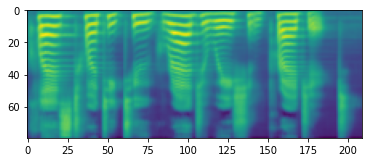

In [21]:
tacotron2 = bundle.get_tacotron2().to(device)

with torch.inference_mode():
  spectrogram, spectrogram_lengths, _ = tacotron2.infer(processed, lengths)

plt.imshow(spectrogram[0].cpu().detach())

### Waveform generation

In [22]:
vocoder = bundle.get_vocoder().to(device)

with torch.inference_mode():
  waveforms, waveform_lengths = vocoder(spectrogram, spectrogram_lengths)

torchaudio.save("output_wavernn.wav", waveforms[0:1].cpu(), sample_rate=vocoder.sample_rate)
IPython.display.display(IPython.display.Audio("output_wavernn.wav"))